In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as matdates
import warnings

In [41]:
# Change filename as appropriate
filename = "Hypochilus Monitor14 Edited LD"
df = pd.read_csv(filename + ".csv", index_col = 0)#, header = None, delimiter="\t")
df['Date-Time'] = pd.to_datetime(df.index, utc=True)

df.set_index('Date-Time', inplace=True)

display(df)

,Light,Spider 1,Spider 2,Spider 3,Spider 4,Spider 5,Spider 6,Spider 7,Spider 8,Spider 9,...,Spider 23,Spider 24,Spider 25,Spider 26,Spider 27,Spider 28,Spider 29,Spider 30,Spider 31,Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2022-10-12 15:43:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-12 15:44:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-12 15:45:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-12 15:46:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-12 15:47:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-18 19:57:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-18 19:58:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-18 19:59:00+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#This function finds all times when lights turn on and off and returns the index of these occurrences
def find_lights_turn_on_off(df):
    lights_turn_on_off = df[df['Light'].diff() != 0]
    
    #drop the first 2 and last row because these are incomplete days
    on_off = lights_turn_on_off.iloc[2:, :]
    
    #turn the index into a list to loop through
    on_off_list = list(on_off.index.values)
    
    #add the last minute of the last day to this list so that the final day can have activity onset as well
    on_off_list.append(np.datetime64(df.index[-1]))
    
    return on_off_list

def create_on_off_sublist(on_off_list):
    on_off_subList = [on_off_list[n:n+2] for n in range(0, len(on_off_list), 2)]
    return on_off_subList
    #create list of all dates and times where lights turn on and off
    transition_indexes_list = find_lights_turn_on_off(df)
    #create sublists containing each day of light switch indeces so they are easy to work with
    on_off_sublist = create_on_off_sublist(transition_indexes_list)
    return on_off_subList

#This function creates a list of dataframes for each date so that each date may be plotted individually
def create_list_of_df(df):
    #find all unique days
    all_days = np.unique(list(df.index.date))
    #create empty list to append to 
    bracket = []
    #loop through dataframe and create new df for every day
    for x in range(len(all_days)):
        bracket.append(df[df.index.date==all_days[x]])     
    return bracket

#This function finds all times when lights turn on and off and returns the index of these occurrences
#We need a new function doing this for the raster plot because the raster plot requires the first time the lights turn on
def find_lights_turn_on_off_for_raster_plot(df):
    #find indices where lights turn on and off
    lights_turn_on_off = df[df['Light'].diff() != 0]
    lights_turn_on_off = lights_turn_on_off.append(df.iloc[-1])
    #drop the first and last row because these are the beginning and end of the days
    on_off = lights_turn_on_off.iloc[1:-1, :]
    #turn the index into a list to loop through
    on_off_list = list(on_off.index.values)
    return on_off_list

#This function sets up the raster plot with subplots, adjusts the axes, and sets datetime for the x axis
def set_up_raster_plot(df, column_name):
    #create list of dataframes each containing a unique date which will be used to plot the data on the graph
    list_of_df = create_list_of_df(df)
    #find all unique days to make the y labels of the graph
    all_days = np.unique(list(df.index.date))
    #set up fig and axis with the number of subplots being the number of unique days, set figsize
    fig, axs = plt.subplots(nrows = len(list_of_df), sharey = True, figsize = (10, 13))
    #adjust space between subplots
    plt.subplots_adjust(hspace = 0)
    #set labels for the x and y axis on the graph, as well as title
    axs[-1].set_xlabel('Time of Day')
    axs[0].title.set_text('Activity for ' + str(column_name) + ' Throughout Each Day')
    #adjust ticks
    for x in range(len(axs)-1):
        axs[x].set_yticks([])
        axs[x].set_xticks([])
    #set up the x axis to have time of day 
    hour_locator = matdates.HourLocator(byhour = range(24), interval = 2)
    axs[-1].xaxis.set_major_locator(hour_locator)
    axs[-1].xaxis.set_major_formatter(matdates.DateFormatter('%H:%M'))
    return fig, axs, list_of_df, all_days

#This function plots the activity data on the raster plot, highlights the times where lights were off, and plots a line for activity onset
def plot_data_on_raster_plot(df, column_name, light_switch_times):
    #use function that set up raster plot to define fig and axs variables
    fig, axs, list_of_df, all_days = set_up_raster_plot(df, column_name)
    #set up for loop that plots each day on each subplot
    for i in range(len(axs)):
        #plot each day
        axs[i].plot_date((list_of_df[i].index.values), list_of_df[i][column_name], color = 'black', linestyle = 'solid',
                        marker = 'None')
        #Make y labels the date
        axs[i].set_ylabel(all_days[i])
        #Set the margins
        axs[i].margins(x = 0.001)
        #add shading for when it is dark for each subplot
        #axs[i].axvspan(list_of_df[i].index[0], light_switch_times[i][0], alpha = 0.5, color = 'grey')
        #axs[i].axvspan(light_switch_times[i][1], list_of_df[i].index[-1], alpha = 0.5, color = 'grey')
        #axs[i].set_facecolor('grey')


    #save the figure as a png file
    plt.savefig(filename + ' ' + column_name + ' Raster Plot.png')

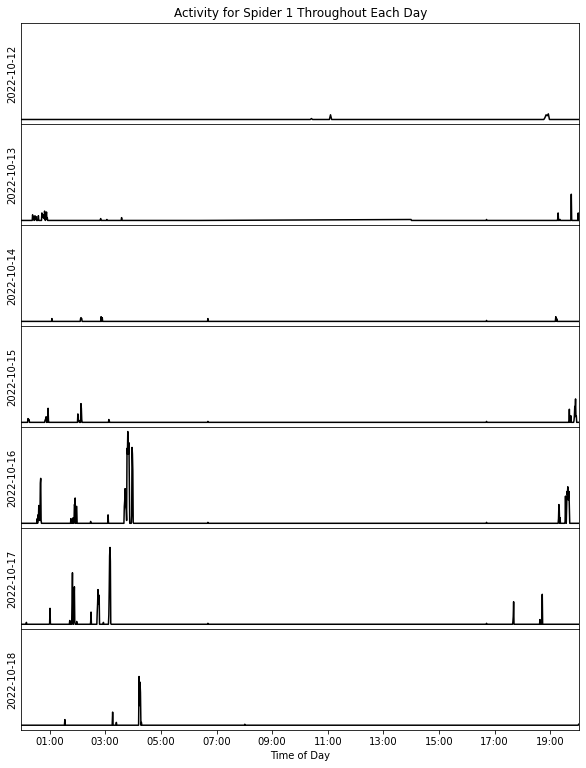

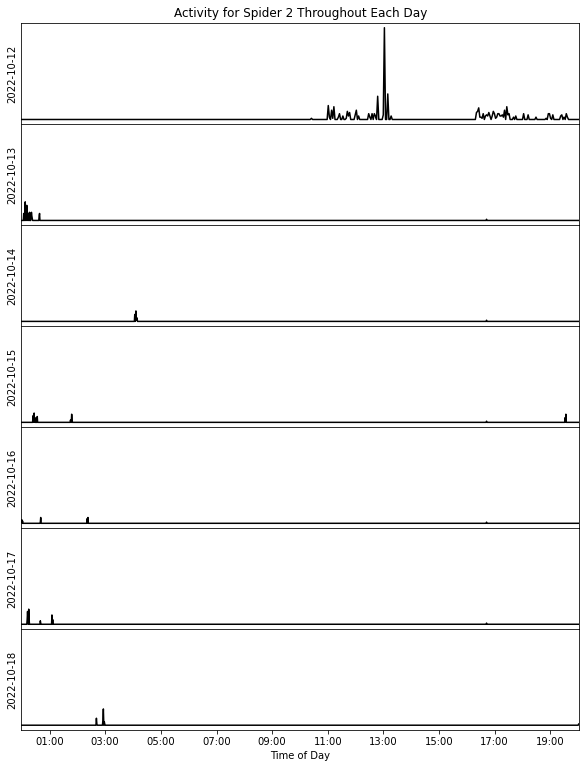

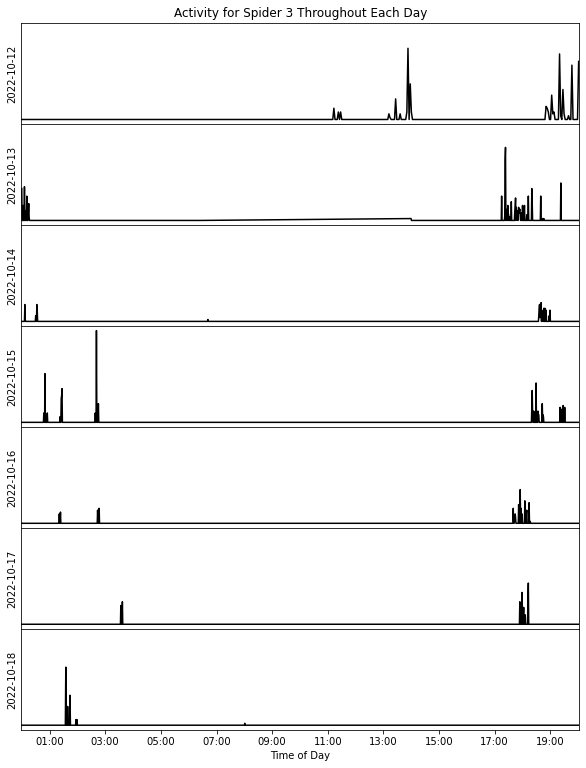

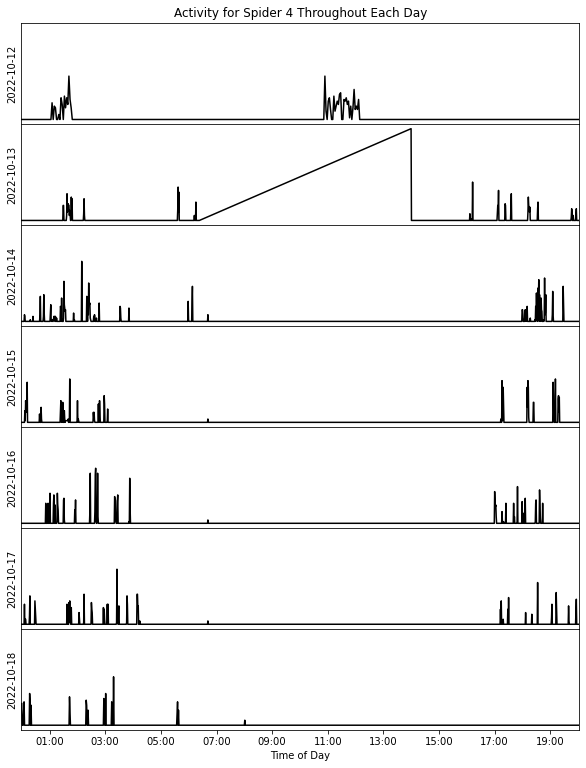

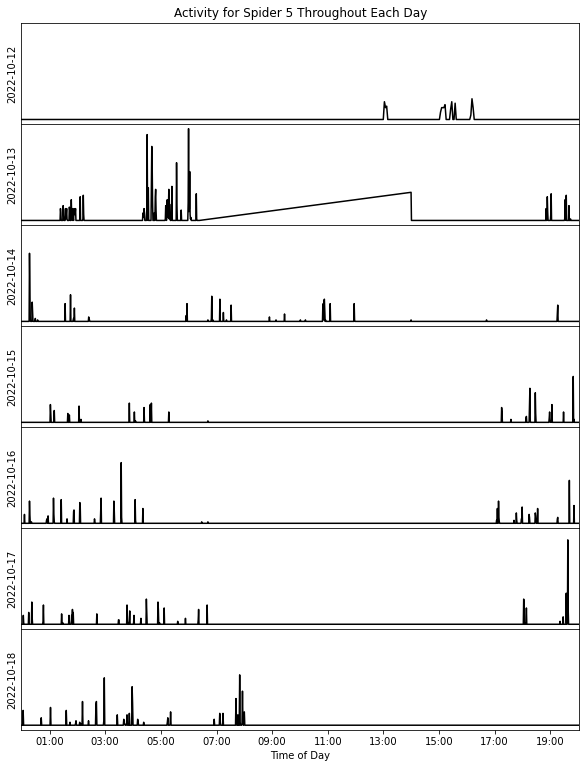

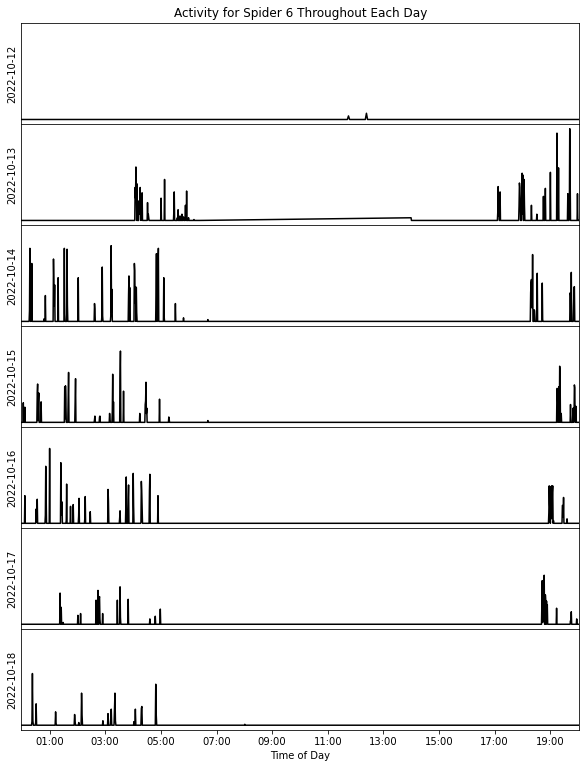

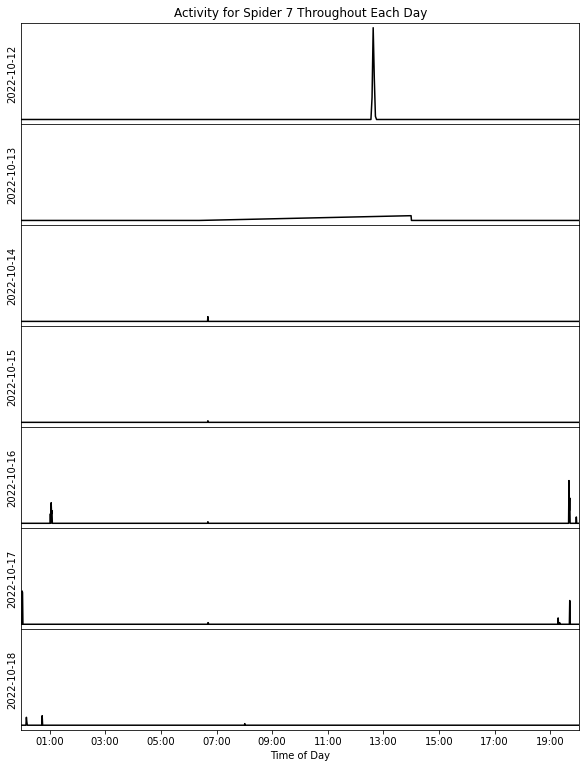

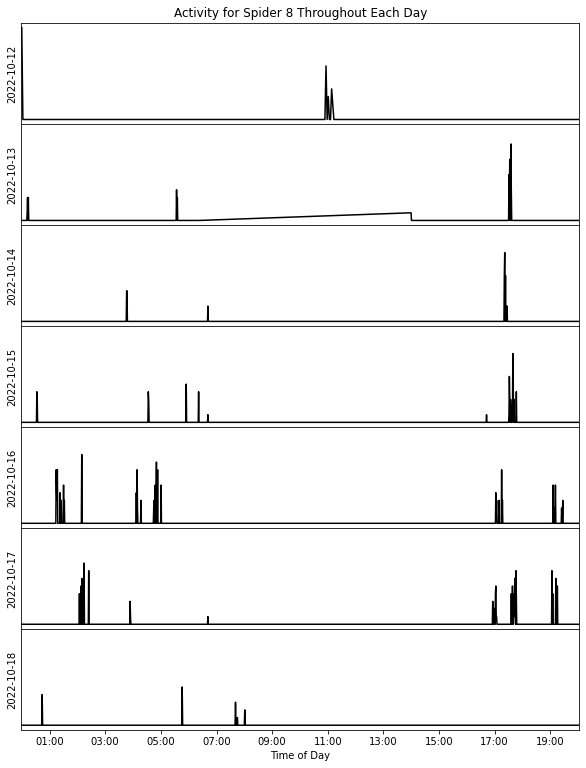

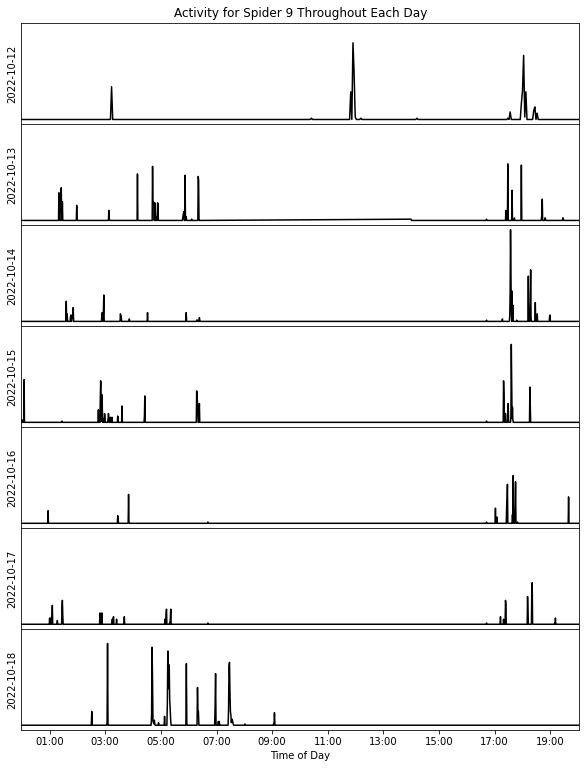

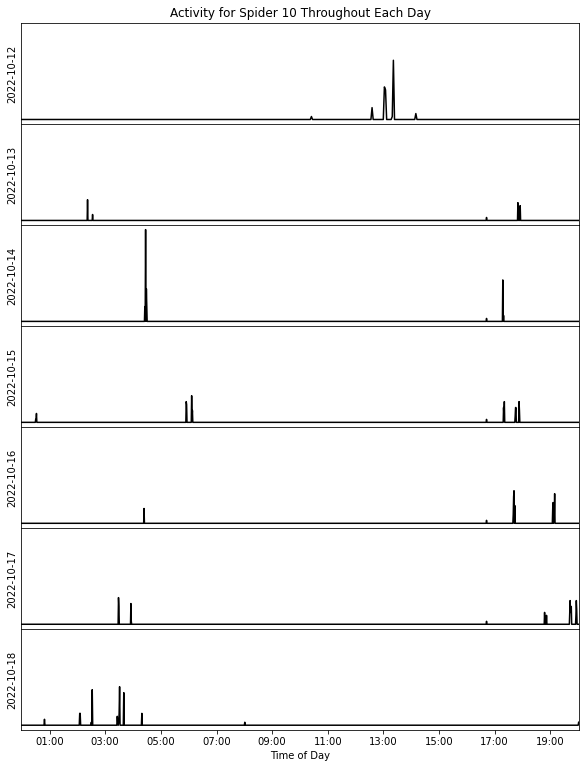

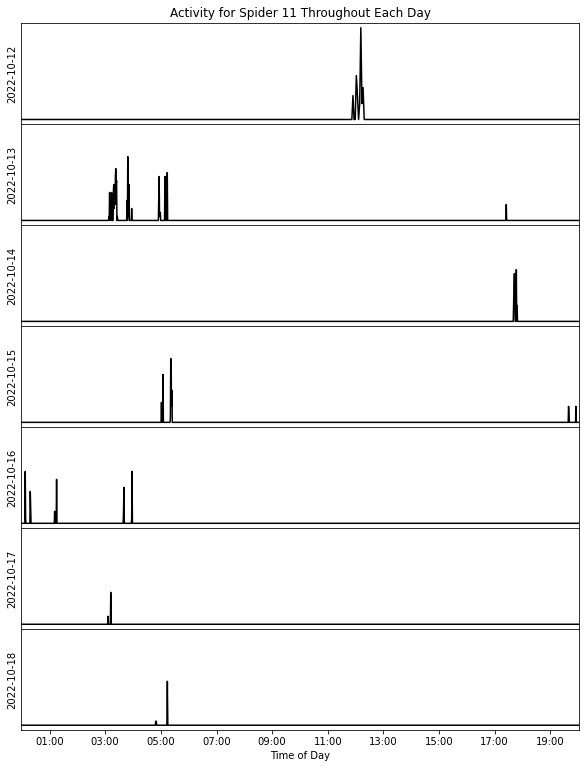

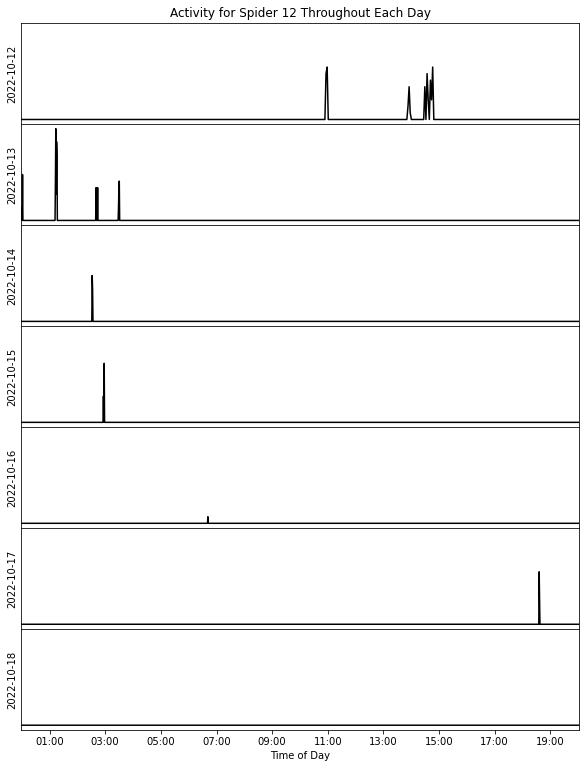

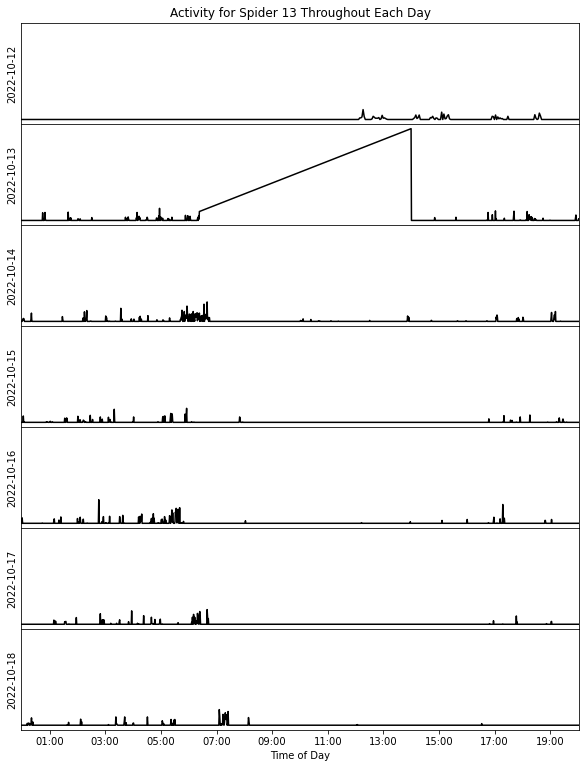

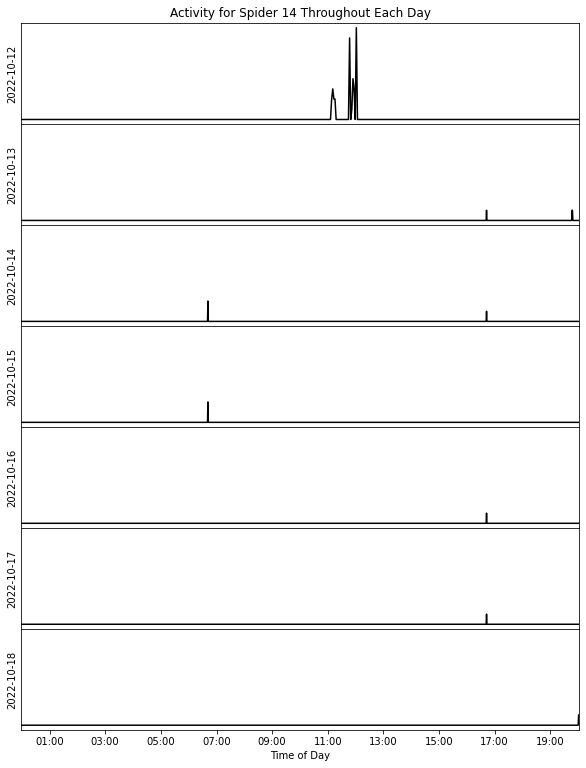

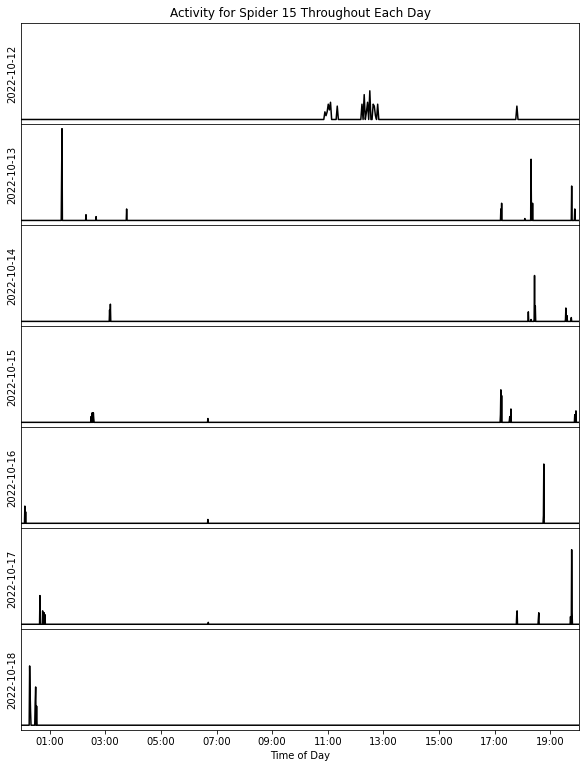

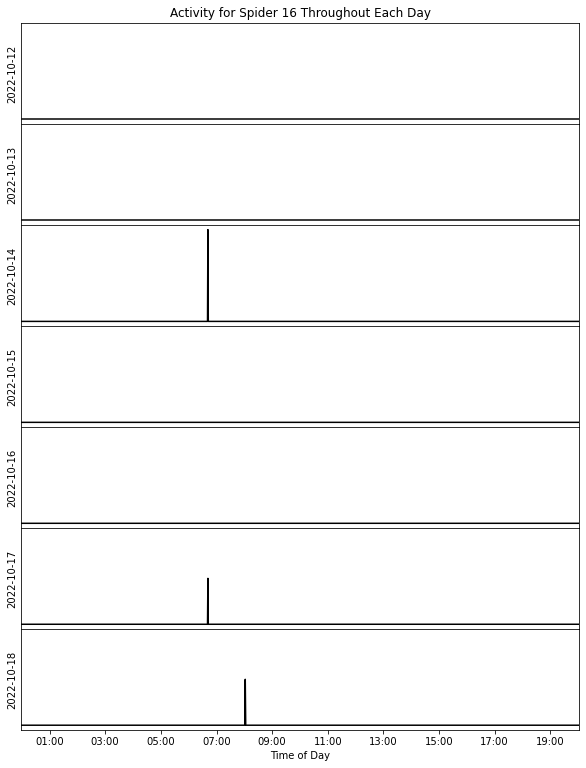

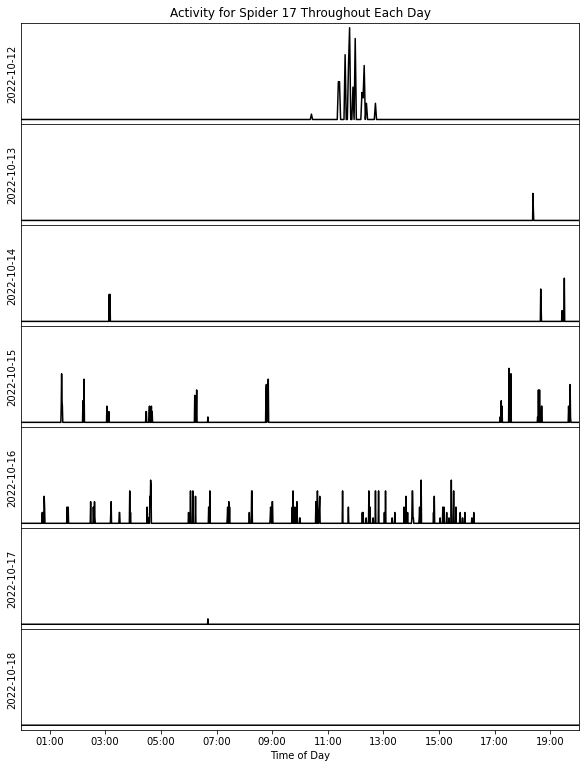

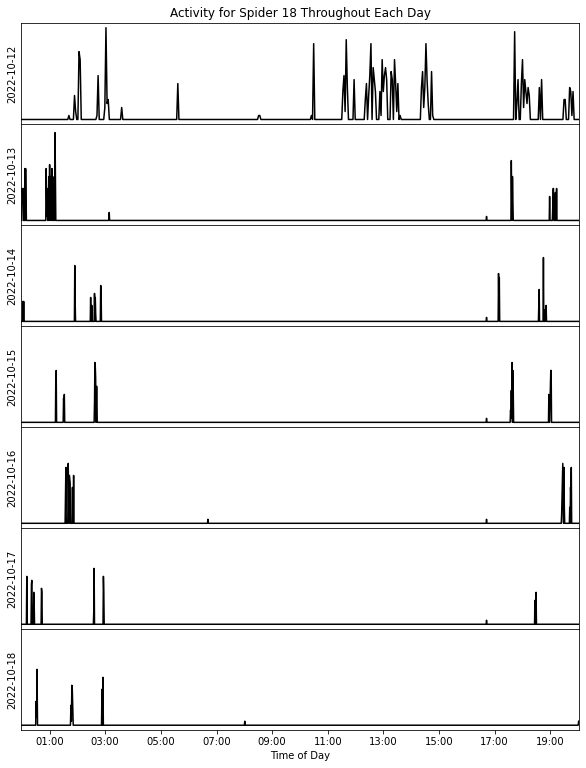

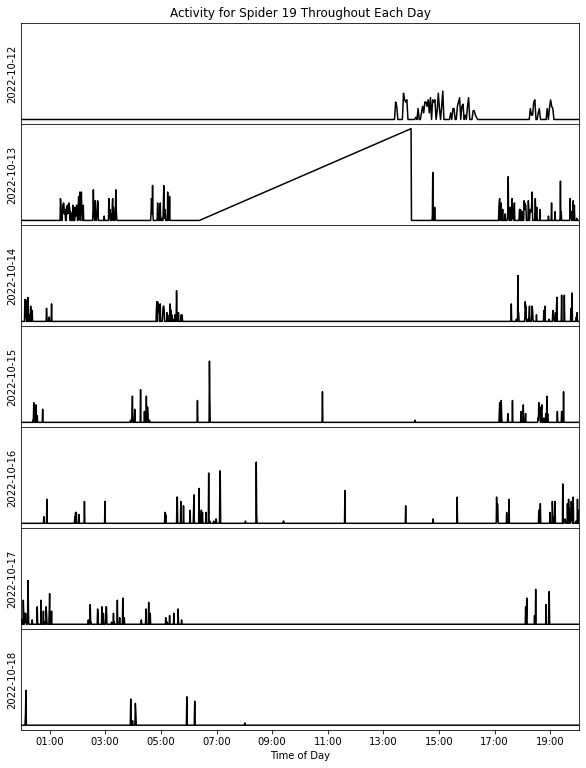

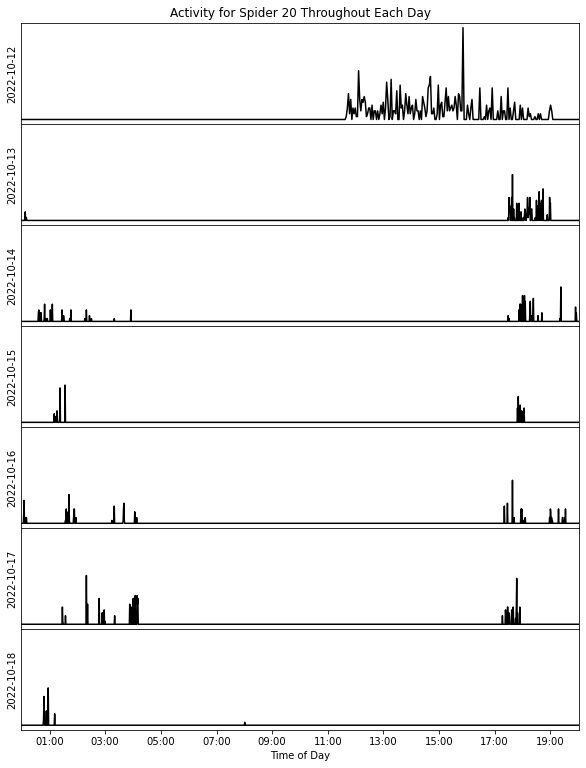

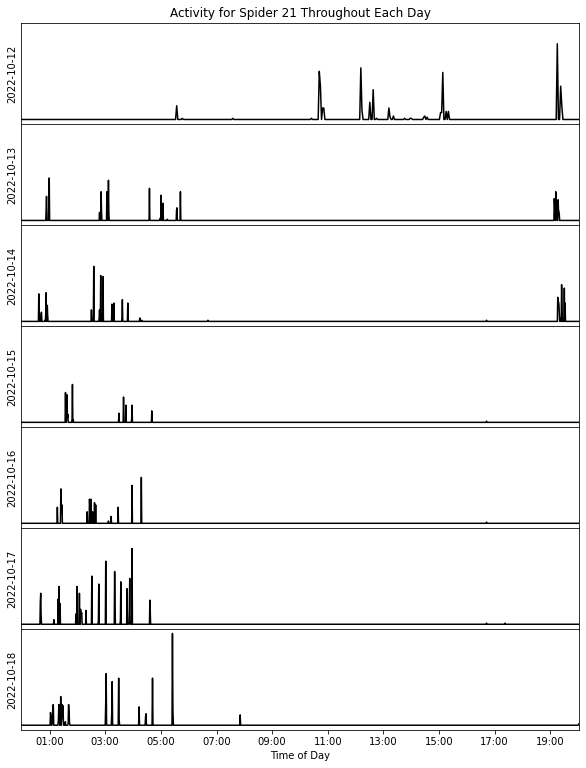

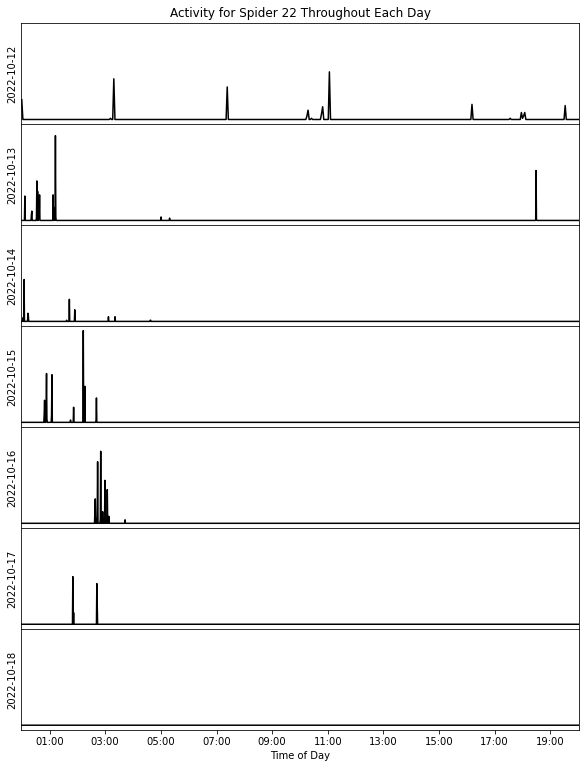

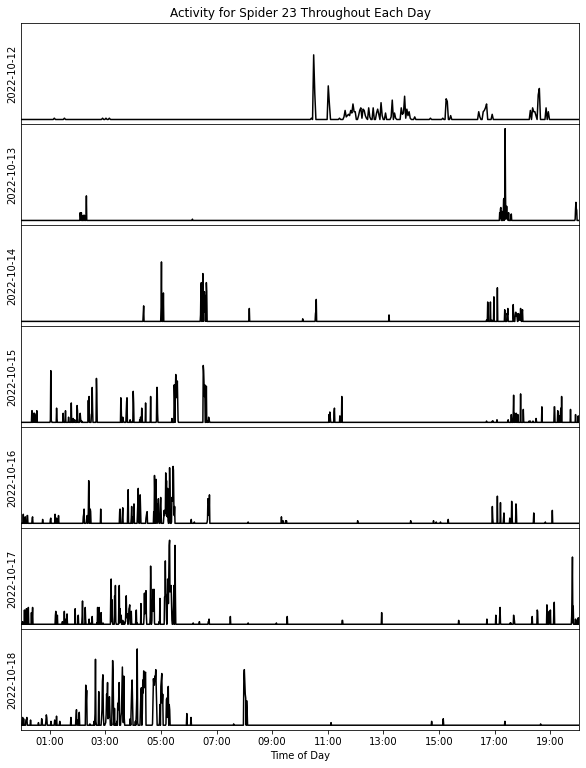

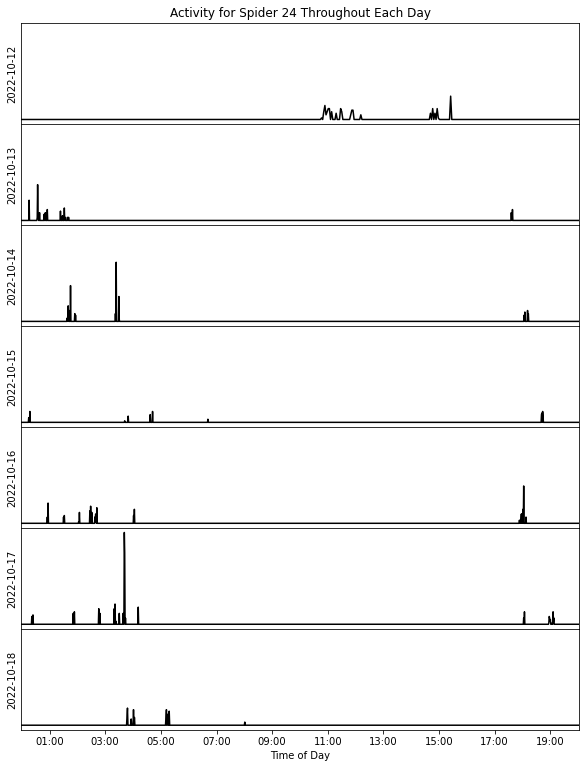

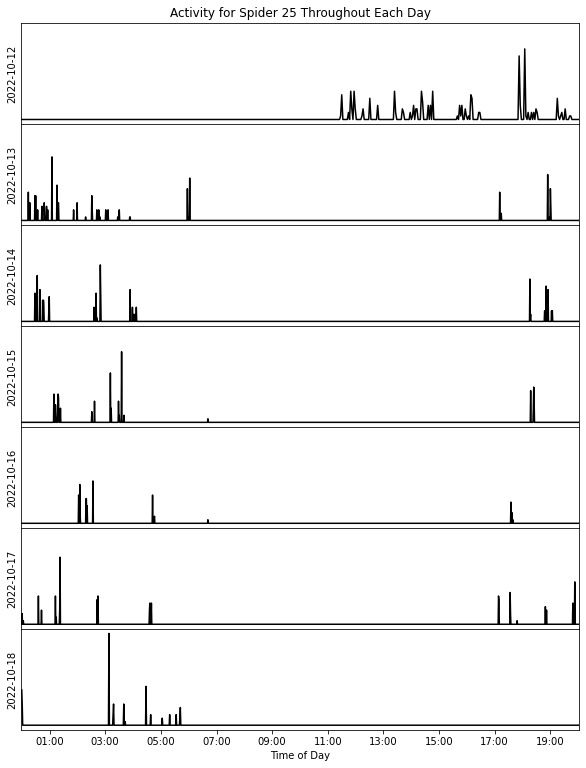

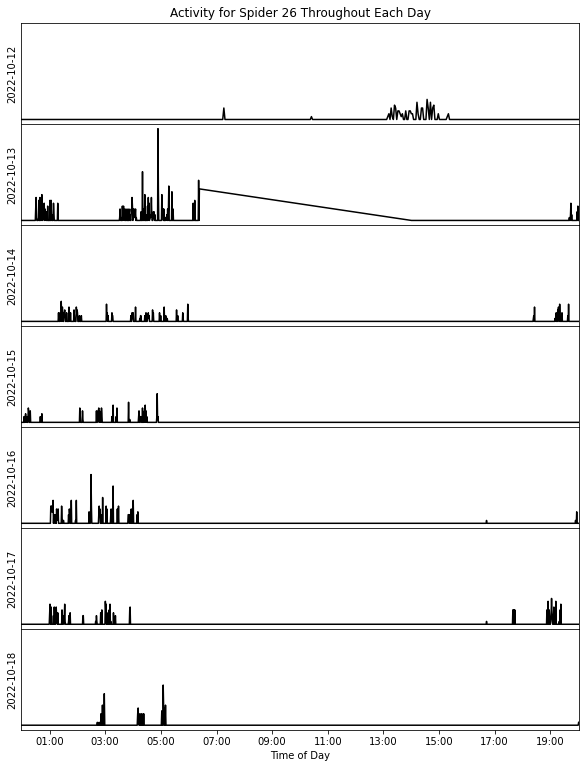

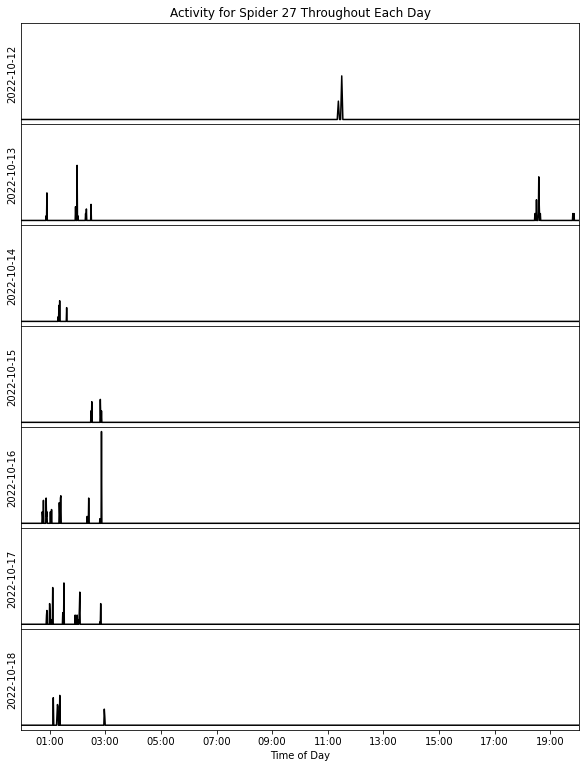

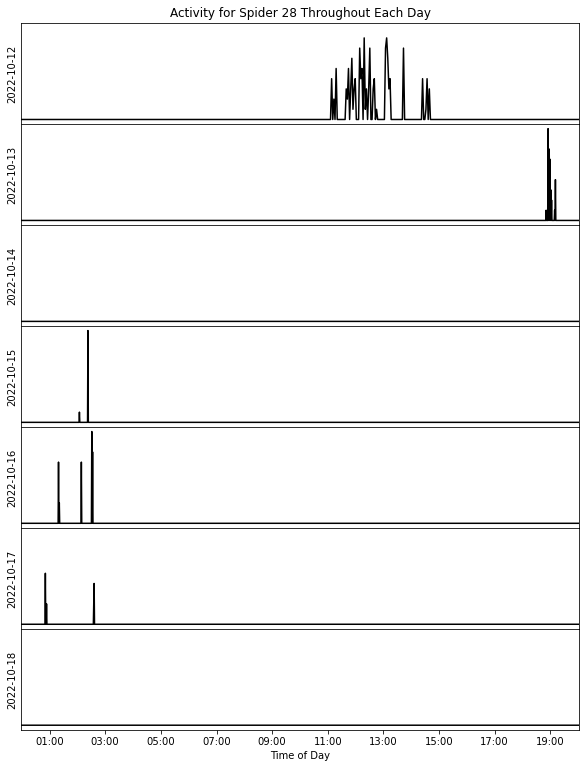

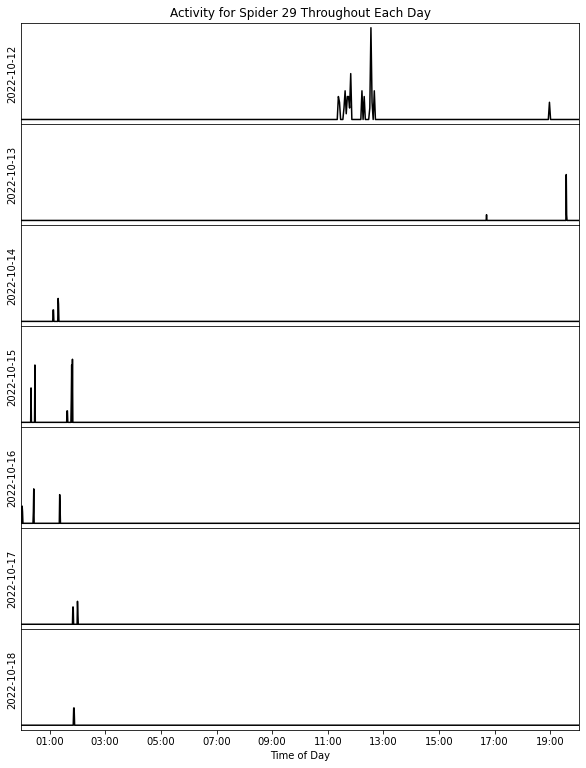

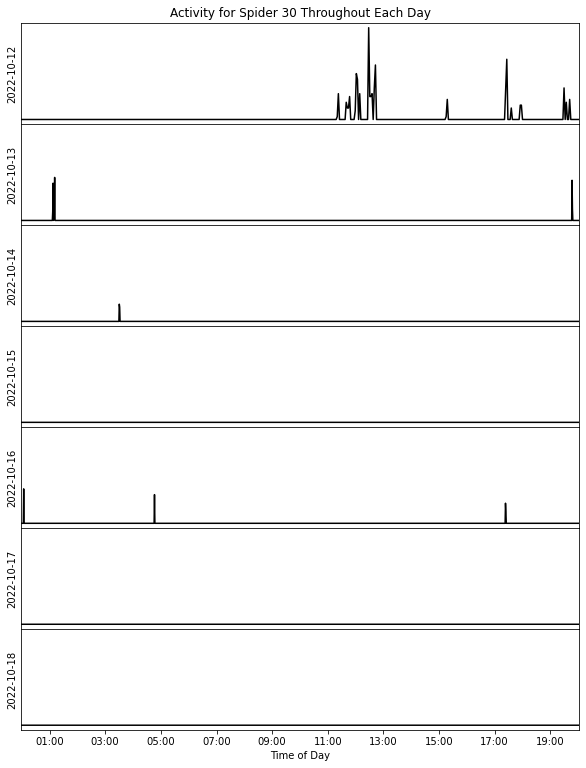

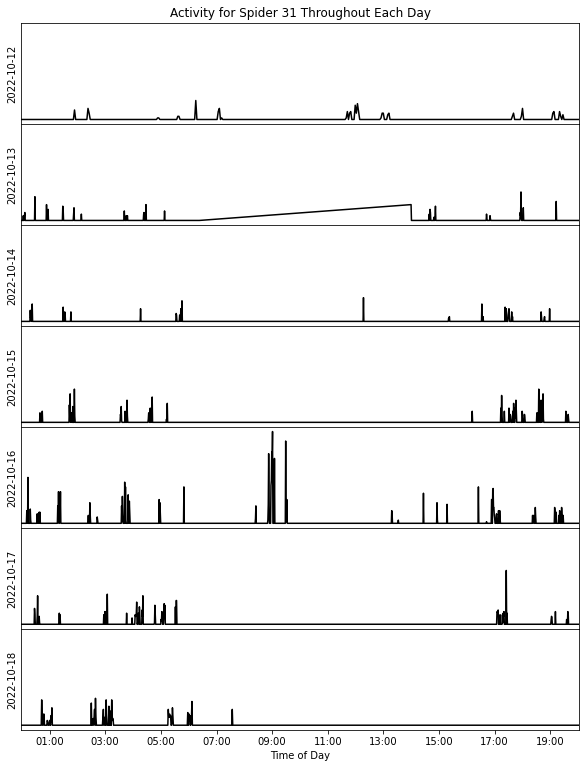

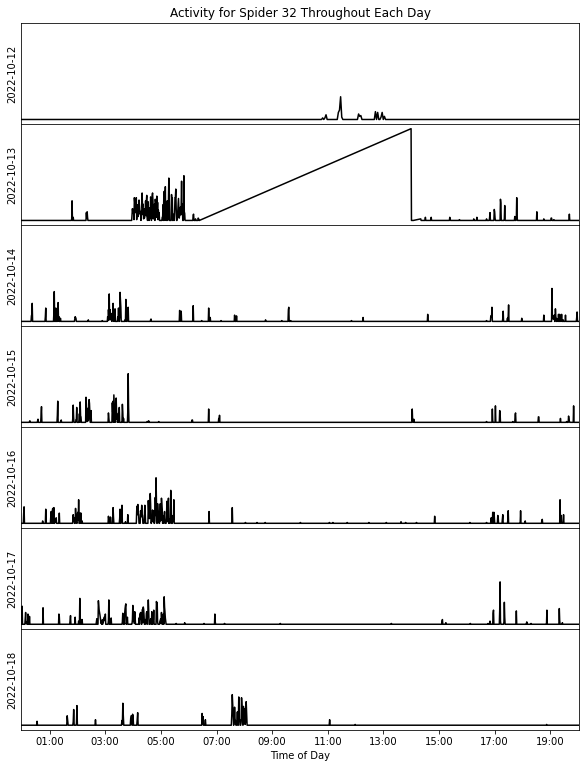

In [51]:
#Create list of times that lights turn on and off so that the raster plot is shaded
light_switch_times_list = find_lights_turn_on_off_for_raster_plot(df)
#Combine list elements with the same date into one element so that they can be looped through
light_switch_times = create_on_off_sublist(light_switch_times_list)
#Create list of spider names to loop through to create raster plots
column_names = df.loc[:, df.columns != 'Light']
#loop through spiders and create raster plots
for x in column_names:
    plot_data_on_raster_plot(df, x, light_switch_times)
    
warnings.filterwarnings("ignore")